Semi-supervised learning decision boundary

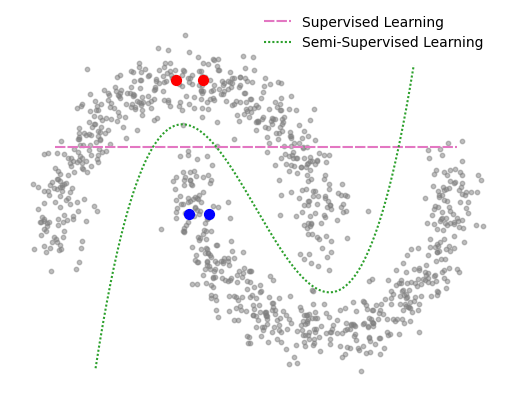

In [14]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
seed=0

Xu, _ = make_moons(n_samples=1000, noise=0.1, random_state=seed)
Xl = np.concatenate([np.array([[-0.1,1],[0.1,1]]), np.array([[0,0.2],[0.15,0.2]])], axis=0)
yl = np.concatenate([np.array([0,0,1,1])])

x1 = np.linspace(-1,2,1000)
x2 = np.linspace(-0.70,1.68,1000)
def f(x):
    return 1.5*(x+0.5)*(x-0.6)*(x-1.4) + 0.1

plt.figure()
plt.scatter(Xu[:,0],Xu[:,1], s=10, c="gray", alpha=0.5)
plt.scatter(Xl[yl==0,0],Xl[yl==0,1], s=50, c="red")
plt.scatter(Xl[yl==1,0],Xl[yl==1,1], s=50, c="blue")
plt.plot([x1.min(),x1.max()], np.array([0.6,0.6]), c="tab:pink", linestyle=(0, (5, 1)), label="Supervised Learning")
plt.plot(x2, f(x2), c="tab:green", linestyle=(0, (1, 1)), label="Semi-Supervised Learning")
plt.axis("off")
plt.legend(frameon=False, loc=(0.5,0.9))
# plt.savefig("ssl_intro.pdf", format="pdf", bbox_inches="tight") # uncomment to save as pdf
plt.show()

trade-off between amount of supervision and performance

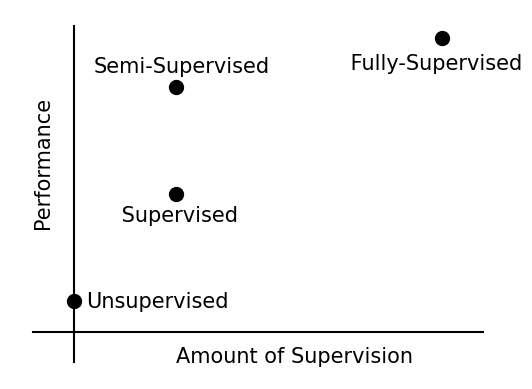

In [15]:
sl_height = 0.96
psl_height = 0.45
ssl_height = 0.8
u_height = 0.1

sl_x = 0.9
ssl_x = 0.25
psl_x = ssl_x
u_x = 0.0

fs=15
plt.figure()
plt.scatter([sl_x,psl_x,ssl_x,u_x],[sl_height,psl_height,ssl_height,u_height], s=100,c="k")

plt.text(sl_x-0.24,sl_height-0.1, " Fully-Supervised", fontsize=fs)
plt.text(psl_x-0.15,psl_height-0.09, " Supervised", fontsize=fs)
plt.text(ssl_x-0.2,ssl_height+0.05,"Semi-Supervised", fontsize=fs)
plt.text(u_x+0.03,u_height-0.02,"Unsupervised", fontsize=fs)

plt.text(0.25,-0.1, "Amount of Supervision", fontsize=fs)
plt.text(-0.1,0.35, "Performance", rotation=90, fontsize=fs)

plt.plot([-0.1,1],[0,0], c="k")
plt.plot([0,0],[-0.1,1], c="k")
plt.axis("off")
# plt.savefig("ssl_performance.pdf", format="pdf", bbox_inches="tight")
plt.show()

A simple example using pseudo-labelling/self training classifier with random forest.

In [16]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X_tr, X_ts, y_tr, y_ts = train_test_split(*make_moons(1000, noise=0.1), train_size=0.7)

number_of_labels = 4
lb_idx = np.random.choice(np.arange(len(X_tr)), number_of_labels)

clf_supervised = RandomForestClassifier().fit(X_tr[lb_idx], y_tr[lb_idx])
print("Test accuacy supervised:", clf_supervised.score(X_ts,y_ts))

y_ssl = -np.ones_like(y_tr)
y_ssl[lb_idx] = y_tr[lb_idx]
clf_semisupervised = SelfTrainingClassifier(RandomForestClassifier()).fit(X_tr, y_ssl)
print("Test accuracy semi-supervised:", clf_semisupervised.score(X_ts,y_ts))

Test accuacy supervised: 0.36
Test accuracy semi-supervised: 0.8366666666666667


Plot the data used in the above example

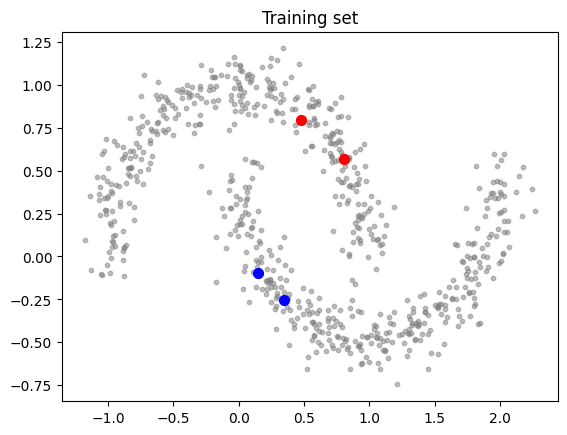

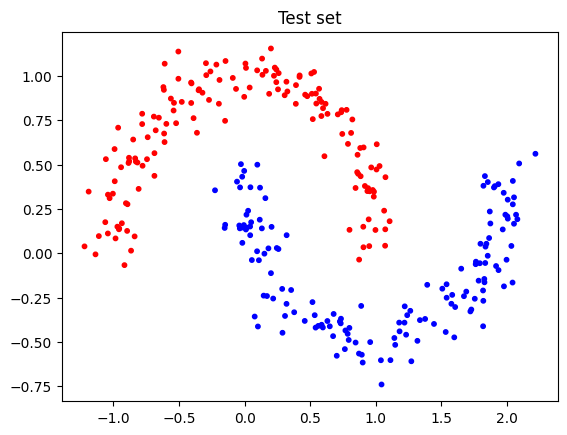

In [17]:
plt.figure()
plt.scatter(X_tr[y_ssl == -1,0], X_tr[y_ssl == -1,1], s=10, c="gray", alpha=0.5)
plt.scatter(X_tr[y_ssl==0,0],X_tr[y_ssl==0,1], s=50, c="red")
plt.scatter(X_tr[y_ssl==1,0],X_tr[y_ssl==1,1], s=50, c="blue")
plt.title("Training set")
plt.show()

plt.figure()
plt.scatter(X_ts[:,0], X_ts[:,1], s=10, c=np.array(["red","blue"])[y_ts])
plt.title("Test set")
plt.show()